# Linear Regression in Practice

This notebook is organized as a sequence of small exercises that you should work **in this notebook**. Some important tips:

 1. Make sure you **document** your solutions, don't just write code -- even if it works perfectly. Use the rich markup abilities of Jupyter to explain each of your solutions and analyze results.

 1. The exercises are all related, so it is a good idea to read ahead to see, for example, the features you might want your **pipeline** to have before implementing it.

 2. Don't change the structure of the notebook. Keep the overall organization as in the original.

 3. Feel free to export the notebook to a Jupyter .ipnb notebook and work on your own Jupyter installation.

 4. For the **final submission** you should submit an .ipnb file, so if you use Google Colaboratory you will need to **export** it to upload your submission.


**VERY IMPORTANT**: Make sure you "Save a copy in Drive" from the File menu so that you can save your changes.

In this lab we will work through an extended example of exploratory data analysis and supervised machine learning using the California Housing Price Dataset. This dataset consists of data about housing characteristics and prices in many districts of the state of California. The **task** this dataset asks us to solve is estimating the median house value in a district from a set of independent housing characteristics.

**Note**: the exercises are inline in this notebook and *not* at the end. The exercises will ask you to write some code and sometimes to provide some analysis of your findings in Markdown cells at the end of the exercise.

## Part 1: Warming Up

In this first set of exercises we will analyze our dataset and build a simple linear regression pipeline. This is a fairly typical task that is asked of anyone working with Data Science: Here is some data, do something useful with it!

### Step 1: Data Modeling

OK, let's get started. The first thing we want to do is get our dataset loaded and start to get a feel for it. This is always a good idea -- we *play* with the data first in order to get a better understanding of it.

In [1]:
# Initial imports -- these are fairly standard.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import pandas as pd

# Import the function that will download the dataset.
from sklearn.datasets import fetch_california_housing

# Load the sklearn version of the California Housing dataset.
ds = fetch_california_housing()

### Exercise 1a: Poking Around

Spend some time looking at the elements of the `ds` we just loaded (it's a python `dict`). Find the description of the dataset and make sure you understand what the features are and what the targets variable is. **Hints**: to get the keys of the dictionary, use: `ds.keys()`.

We are going to construct a Pandas `DataFrame` in the next exercise. Where can you get reasonable column names from the sklearn dataset object?

In [2]:
# Your code here.

# print(ds)
# print(f"\nDescr.   = {ds['DESCR']}")

# Discover
print(f"\nkeys      = {ds.keys()}")
print(f"\nfeatures  = {ds['feature_names']}")
print(f"\ntarget    = {ds['target_names']}")

# Data
print(f"\ndata      = {ds['data'][0]}")
print(f"\nTot data  = {len(ds['data'])}")

# Target
print(f"\ntarget    = {ds['target'][0]}")
print(f"\n# targets = {len(ds['target'])}")

# Frame
print(f"\nframe    = {ds['frame']}\n")



keys      = dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

features  = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

target    = ['MedHouseVal']

data      = [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]

Tot data  = 20640

target    = 4.526

# targets = 20640

frame    = None



**Your Analysis**: Modify this Markdown cell with the results of your playing around in the above code cell. The point of Notebooks is to build self-documenting, executable, and reproducible analyses of your work -- so **document** on the way.

---

As a first step I've just printed "ds" as a whole, obtaining a mixure of hardly reable info about the dict: keys, some values and extra info.

Printing only keys of the dictionary: 'data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'.

Then, extracting feature and target:
    
    • There are 8 features: 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'.
    Which are attribute of each group: geographic location, income, romms and bedrooms, etc.
                   
    • And a target: 'MedHouseVal'.
    
    • 'data' cointans an 8 values list for each measurement, corresponding respectively to the features values, which makes the "header".
    
    • Extra info to take into account: dataset contains 20640 total instances, as well as 20640 targets.
    
    • 'frame' looks empty.
    

### Exercise 1b: Creating a Pandas DataFrame

OK, now we can create the `DataFrame` to hold our independent variables and a `Series` to hold the target values. Make sure you use good column names when constructing the `DataFrame`. Some relevant documentation: [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) and [pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).

In [3]:
# Create a Pandas DataFrame for our dataset and a Pandas Series for the targets.

# Your code to build the DataFrame here (replace None)

df = pd.DataFrame(ds['data'], columns = ds.feature_names)  # ds.feature_names == ds['feature_names'] : attribute || indexing
print(f"\ndf    =\n{df}\n")

# Your code to build the target Series here (replace None)
targets = pd.Series(ds.target)   # , name = 'MedHouseVal')  # , ds.target_names)
print(f"\ntargets    =\n{targets}\n")



df    =
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -1

### Exercise 1c: Examining the Data

Study the *descriptive statistics* of the data. Do you notice anything "strange" about any of the features? Are the features scaled similarly? **Hint**: Use the `.describe()` method on the DataFrame you created.

In [4]:
# Your code here.

# Overview of df, with some stat values
df.describe()
# targets.describe()

# Plot to visualize values and trends
# for elem in df:
#     plt.figure(figsize = (7,7))
#     plt.plot(df[elem])
#     plt.title(f"{df[col].name}")


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


**Your Analysis Here** (in Markdown).

---

Some observations:
    
- There are no missing data in the dataframe.
- Values have different unit of measurement.
- Columns:
    - MedInc: "Median income in block", values look truncated at ~0.5 below and to ~15 above. Values are measured in tens of thousands of US Dollars.
    - HouseAge: "Median house age in block", values look truncated ~52 above. It's the age of the houses in years.
    - *AveRooms: "Average number of rooms", some -few- values are massively differents from the trend, probably outliers. E.g. 3÷8 looks the expected range, but some values go to 40 and over 140.
    - *AveBedrms: "Average number of bedrooms", similarly to “AveRooms”, at a first glance, there are some very out-of-range values, considering a mean value of ~1.1 and a max value of ~34.
    - *Population: "Block population", population living in the area of the houses block considered, also here some values look out of range (mean = ~1425, max = 35682).
    - *AveOccup: "Average house occupancy", mean number of people per house, again for these data, considering a mean value of 3 and max of ~1243.
    - Latitude: "House block latitude", 
    - Longitude: "House block longitude"
        - Latitude and Longitude are geographic coordinates, in degrees, respectively from equator to North and east-west considering they're negatives.

Some features are scaled similarly and some are not, since some values are of the magniture of 10^3÷10^4 and some are in the range 0÷15.

A block group is the smallest geographical unit for the US statistics office.


---
### Step 2: Visualization

OK, now that we have a bit of a *feel* for our data, let's get a better idea about it through visualization.

### Exercise 2a: Visualizing the Target
Create a plot to study the **distribution** of our target values. The best tool for that is a **histogram**. Search for this functionality in the Matplotlib documentation.

**Note**: In addition to *histograms*, try out the Seaborn function `distplot`.

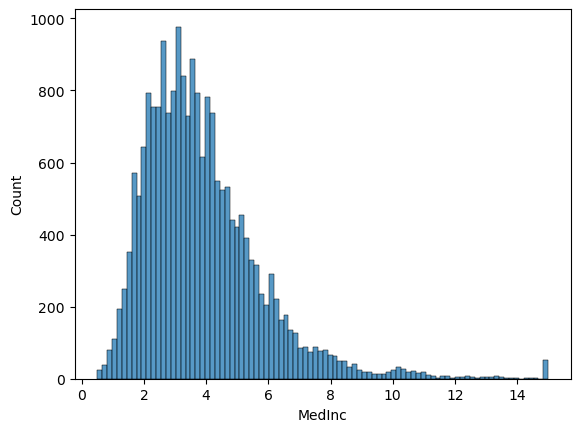

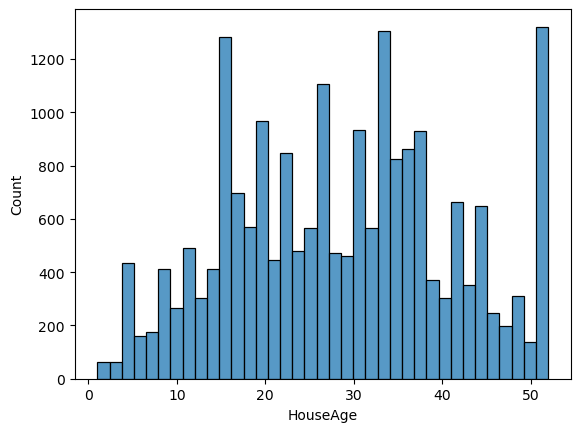

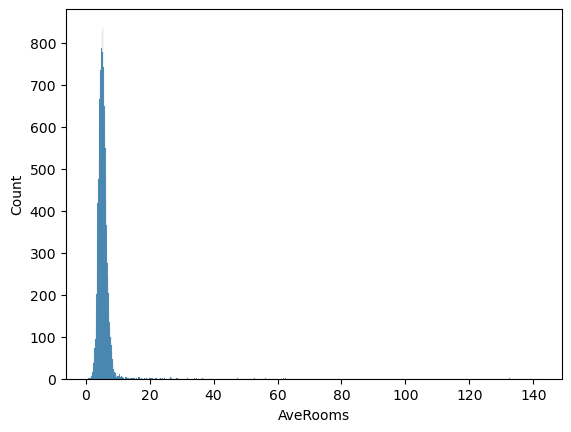

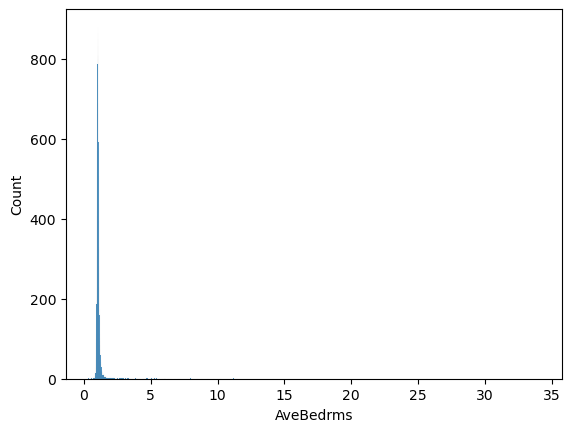

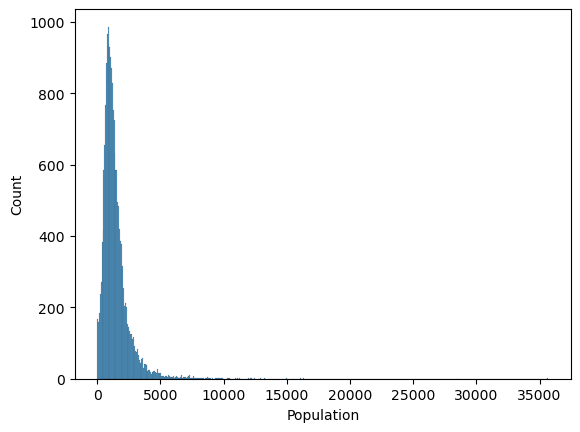

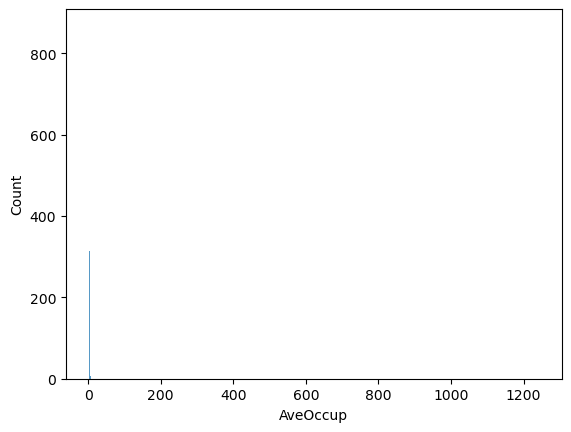

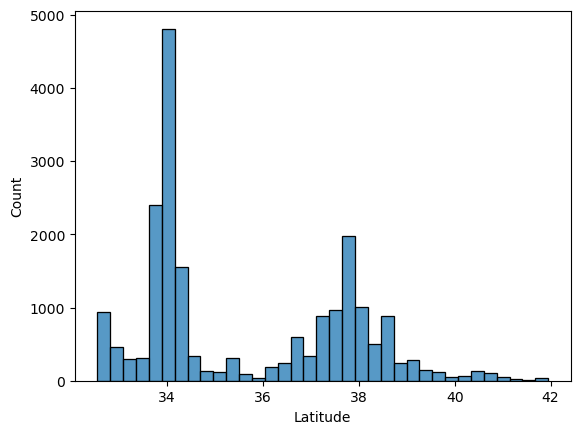

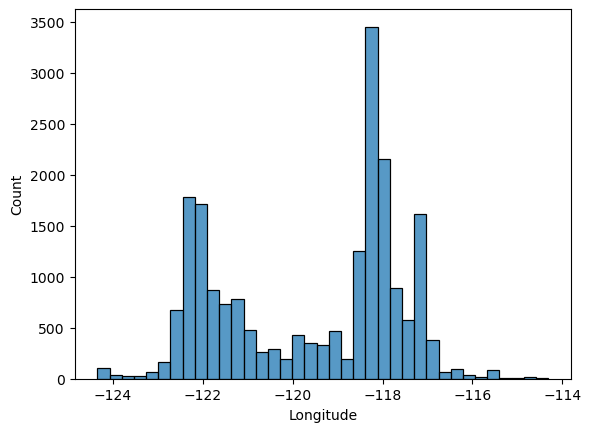

In [5]:
# Your visualization code here.

## Plot func
# for col in df:
#     plt.figure()  # figsize = (7,7))
#     plt.hist(df[col], bins = 50)
#     plt.title(f"{df[col].name}")


# distplot deprecated, the following instead:
# Histplot func
for col in df:
    plt.figure()
    sb.histplot(df[col])
    plt.show()
    

## Displot func
# for col in df:
#     plt.figure()
#     sb.displot(df[col])
#     plt.show()


**Your Analysis Here**


---

As already mentioned in the previous section, we can underline that some values discard from a standard distribution because of some outliers (data out of scale).

In the case of longitude and latitude, for example, there is also phisical geography influencing data.

It seems there's correlation between Population, AveRooms, Avebedrms. At least their values have similar distribution.


### Exercise 2b: Subplots
Now create a multi-plot figure to visualize the distributions of **all** of the independent features in the dataset. Make sure you use `figsize=` to resize the figure appropriately.

A few things that will help with this:
+ If you want to index columns by **integer** indices, use the `.iloc()` method (e.g. `df.iloc[:,1]`).
+ If you extract a column as a `Series` from a `DataFrame`, you can recover its name with the `name` attribute.
+ Encapsulate you plotting code in a **function** you can call later.

**Super Hint**: Pandas already has this functionality **built-in**. If you can find it, use it!


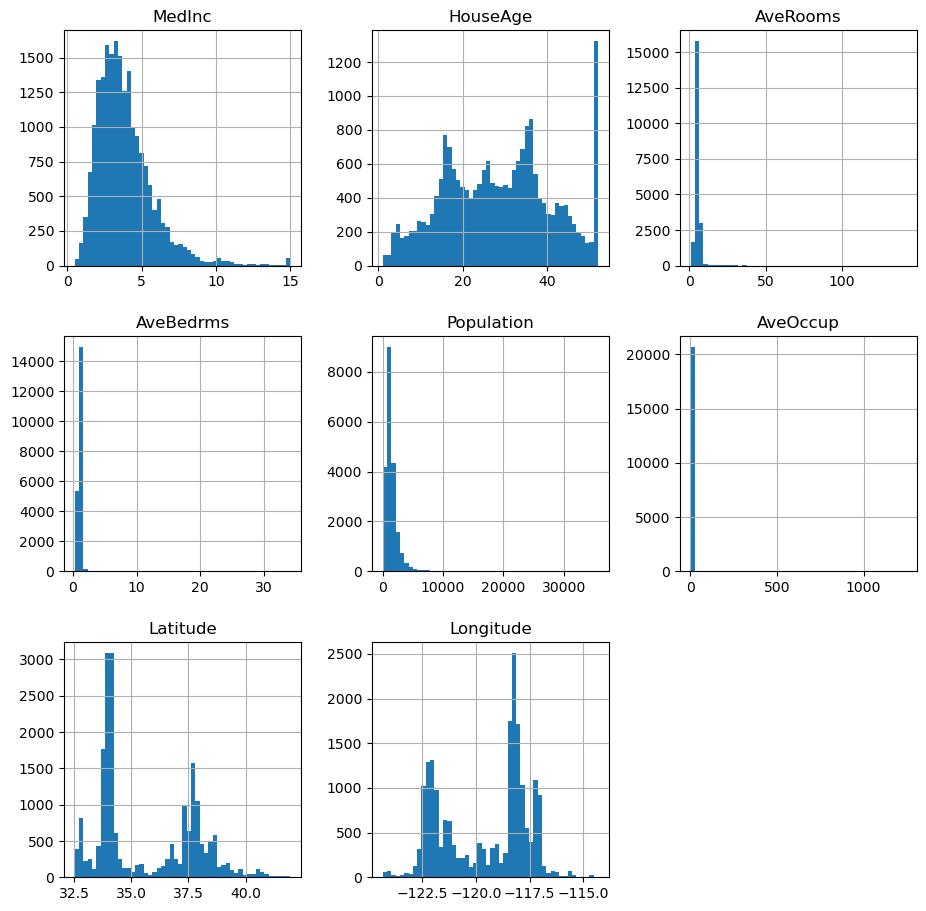

In [8]:
# Your code here.


def plot_fun(features):
    features.hist(figsize = (11, 11), bins = 50)

plot_fun(df)

# targets.plot.hist()


---
## Step 3: Split you Data

A very important step. Now we will split our `DataFrame` into training and testing splits.

### Exercise 3.1: Create a Split
Now we need to create our training and testing splits. Read the documentation for `sklearn.model_selection.train_test_split()`. Use this function to create a **training** split with 75% of the data, and a **test** split with 25% of the data.

In [73]:
# Your code here.
from sklearn.model_selection import train_test_split

# Split data into 75-25 train/test split -- replace the [None]*4 with your code.
(Xtr, Xte, ytr, yte) = train_test_split(df, targets, test_size = 0.25)  # , train_size = 0.75)


### Exercise 3.2: Fit a LinearRegression
Finally some machine learning. Study the documentation for `class sklearn.linear_model.LinearRegression`. Then write some code to fit a linear regression model to your **training** split. Try out your model by computing predictions on some data (use the `model.predict()` method).


In [10]:
from sklearn.linear_model import LinearRegression

# Your code here.

# model_train  = LinearRegression().fit(Xtr, ytr)
# model_test   = LinearRegression().fit(Xte, yte)
model  = LinearRegression().fit(Xtr, ytr)


# ypr_tr = model_train.predict(Xtr)
# ypr_te = model_test.predict(Xte)
ypr_tr = model.predict(Xtr)
ypr_te = model.predict(Xte)


def ploty(ya, t):
    # print(ypr)
    # print(yte)

    # plt.figure(figsize=(7, 7))
    # plt.scatter(ya, yb)
    # plt.show()

    plt.figure(figsize = (5, 5))
    plt.plot(ya)
    plt.title(f"y predicted {t}")
    plt.show()

    print(f"\ny predicted coefs     = {model.coef_}")
    print(f"\ny predicted intercept = {model.intercept_}")
    print(f"\ny predicted mean      = {ya.mean()}, \
            \ny measured mean       = {targets.mean()}\n")  # values in hundreds of thousands of dollars

# ploty(ypr_tr, "Train")
# ploty(ypr_te, "Test")

# targets.describe() 

#### Predictions over Train 'n' Test sets:

y-train predicted mean  = 2.0733925187338476

y-test predicted mean   = 2.046519581198655

Despite 1 to 3 ratio over the amount of fitting data, the results in prediction are very similar.

They change a very little in different runnings of the code. The starting seed should be fixed to avoid this.

### Exercise 3.3: Evaluate your Model
Write some code to compute the root mean-squared error (RMSE) and mean absolute error (MAS) for you model predictions. Try it on both the **test** and **training** splits.

In [11]:
# Your code here.
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def evaluate(ypr, y, t):
    
    MAE  = mean_absolute_error(ypr, y)
    RMSE = mean_squared_error(ypr, y, squared = False)
    
    print(f" MAE {t}\t= {MAE},\
          \nRMSE {t}\t= {RMSE}\n")  
    
    return MAE, RMSE
    
print("\n--------------------------------------")

MAE_tr, RMSE_tr = evaluate(ypr_tr, ytr, "Train")
MAE_te, RMSE_te = evaluate(ypr_te, yte,"Test")

delta_MAE  = abs(MAE_tr - MAE_te)
delta_RMSE = abs(RMSE_tr - RMSE_te)

print(f" MAE diff\t= {delta_MAE} \
      \nRMSE diff\t= {delta_RMSE}")

print("--------------------------------------")
    


--------------------------------------
 MAE Train	= 0.5293310377323288,          
RMSE Train	= 0.7214625146655494

 MAE Test	= 0.5362892057404522,          
RMSE Test	= 0.7322833970236894

 MAE diff	= 0.006958168008123433       
RMSE diff	= 0.010820882358139938
--------------------------------------


**Your Analysis Here**: Why is the performance on the train set different than that on the test split? What if you change the proportion of training to test data in your splits?

---


The performance is similar, even if you change the proportion of test and training split of the dataset, while I expect more overfitting with more data in training this could related to the relative low standard deviation of data.

### Exercise 3.4: Visualizing the Results
Now I want you to write a function that makes a **residual plot** of the data and the model predictions. This plot should show, for each data point, the **signed error** (i.e. y - predicted) of the model prediction. Do you notice any **patterns** in the errors? Can you link this to previous analyses you made? 

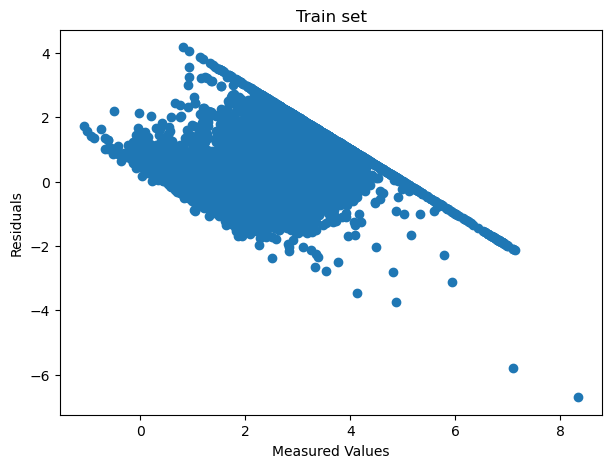

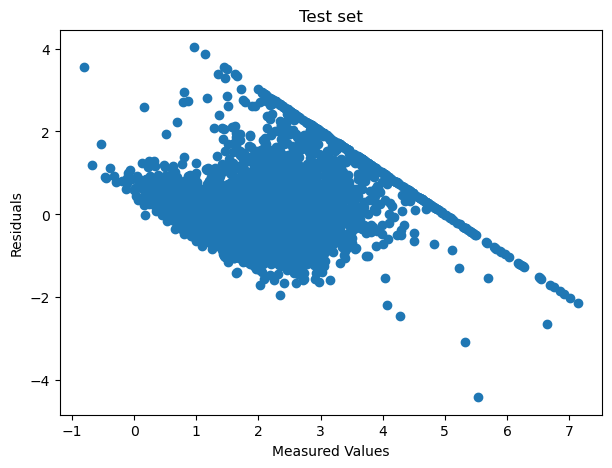

In [12]:
# Your code here.

def plot_res(y, ypr, t):
        
    resid = y - ypr
    
    plt.figure(figsize = (7, 5))
    plt.scatter(ypr, resid)
    plt.xlabel('Measured Values') 
    plt.ylabel('Residuals') 
    plt.title(f"{t} set") 
    plt.show()

plot_res(ytr, ypr_tr, "Train")
plot_res(yte, ypr_te, "Test")


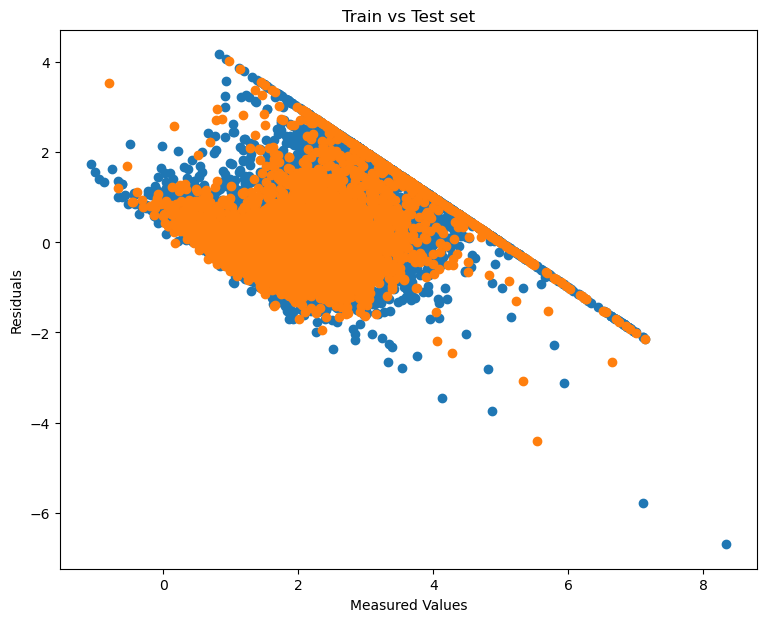

In [19]:
def plot_res_ov(y, ypr, t):  # overlap
    
    resid = y - ypr
    
    plt.xlabel('Measured Values') 
    plt.ylabel('Residuals') 
    plt.title(f"Train vs Test set") 
    plt.scatter(ypr, resid)

    
plt.figure(figsize = (9, 7))
plot_res_ov(ytr, ypr_tr, "Train")
plot_res_ov(yte, ypr_te, "Test")

**Your Analysis Here**

---

Looking at the overlapped diagram, it is possible to see that residuals computed by Train set and Test set have the same pattern.



### Step 4: Repeat.

Now you should put all of the pieces together into a repeatable, reproducible pipeline.

### Exercise 4: The Pipeline
Write a function (or even just code in the cell that calls previously defined functions) that runs an **experiment**:
1. Splitting data
1. Instantiating the model
1. Fitting the model
1. Evaluating the model
1. (Maybe) Visualizing results

Experiment with different splits to see if the results are the same. Try using more or less training data with respect to test data. Observe how the results change.

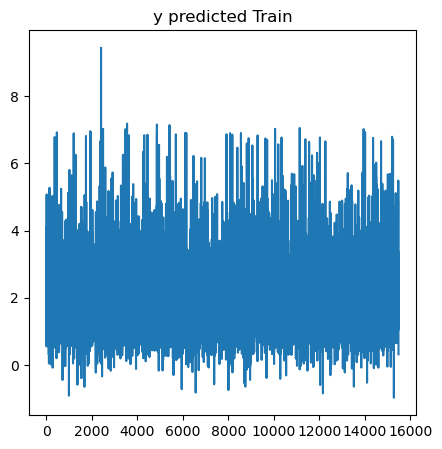


y predicted coefs     = [ 4.32219154e-01  9.13561205e-03 -9.96905857e-02  5.96282201e-01
 -5.97842212e-06 -3.92615753e-03 -4.21000246e-01 -4.33447819e-01]

y predicted intercept = -36.78697796031919

y predicted mean      = 2.0709678365633106,             
y measured mean       = 2.068558169089147



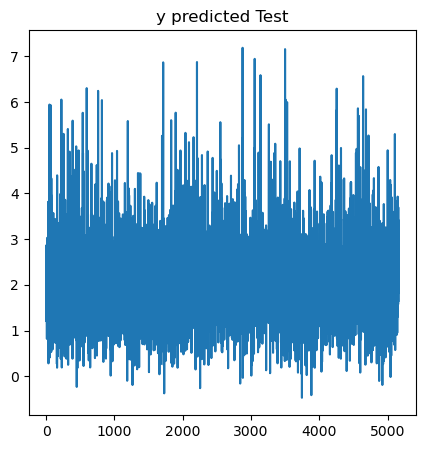


y predicted coefs     = [ 4.32219154e-01  9.13561205e-03 -9.96905857e-02  5.96282201e-01
 -5.97842212e-06 -3.92615753e-03 -4.21000246e-01 -4.33447819e-01]

y predicted intercept = -36.78697796031919

y predicted mean      = 2.0704901382797813,             
y measured mean       = 2.068558169089147


--------------------------------------
 MAE Train	= 0.5333480464326954,          
RMSE Train	= 0.7251904853671611

 MAE Test	= 0.5256555858789131,          
RMSE Test	= 0.721128620037812

 MAE diff	= 0.007692460553782254           
RMSE diff	= 0.004061865329349157
--------------------------------------



(0.5333480464326954, 0.7251904853671611, 0.5256555858789131, 0.721128620037812)

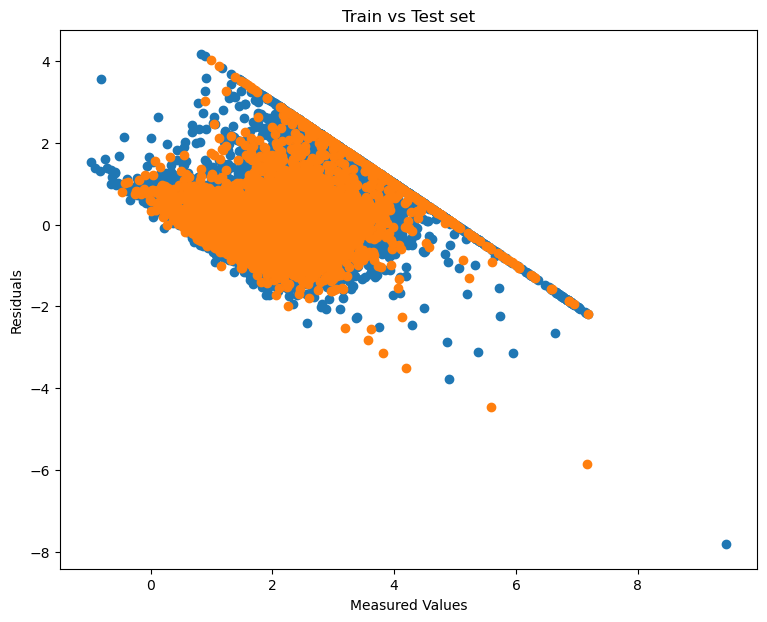

In [123]:
# Your pipeline code here.

def pipeline(test_size, train_size, model = LinearRegression(), df = df, targets = targets):
    
    # splitting data
    (Xtr, Xte, ytr, yte) = train_test_split(df, targets, test_size = test_size, train_size = train_size) 
    
    # fitting model
    model  = model.fit(Xtr, ytr)
    
    # evaluating model
    ypr_tr = model.predict(Xtr)
    ypr_te = model.predict(Xte)
    ploty(ypr_tr, "Train")
    ploty(ypr_te, "Test")

    # visualizing errors
    print("\n--------------------------------------")
    MAE_tr, RMSE_tr = evaluate(ypr_tr, ytr, "Train")
    MAE_te, RMSE_te = evaluate(ypr_te, yte, "Test")

    delta_MAE  = abs( MAE_tr - MAE_te)
    delta_RMSE = abs(RMSE_tr - RMSE_te)

    print(f" MAE diff\t= {delta_MAE} \
          \nRMSE diff\t= {delta_RMSE}")
    print("--------------------------------------\n")
    
    # visualizing residuals
    plt.figure(figsize = (9, 7))
    plot_res_ov(ytr, ypr_tr, "Train")
    plot_res_ov(yte, ypr_te, "Test")
    
    return MAE_tr, RMSE_tr, MAE_te, RMSE_te
    
    # pass
    
pipeline(test_size = 0.25, train_size = 0.75)

**Your Analysis Here**: Experiment with different splits to see if the results are the same. Try using more or less training data with respect to test data. Observe how the results change.

---

As metioned before, the results are quite similar considering different splits, but they change sometimes in different running of the code, probably since some outliers go randomly in train set or test set.

Despite this, the model appears to have low variance in results.




---
---
## Part 2: Improving our Regressor

Now that we have a simple, baseline linear regression result, let's see if we can't improve on it. This is where the real work begins, and where it is **super** important to ensure that the conclusions we draw are *valid*.

**Questions**: Are our independent variables *scaled* similarly? Does our model have *high variance* -- that is, if we fit it to a new training sample, does the result vary dramatically?

### Exercise 5: Increasing Model Capacity

Check out the documentation for `sklearn.preprocessing.PolynomialFeatures`. Map the independent variables onto a **polynomial** basis of variable order. Fit your model using your pipeline from above and observe its behavior for different degree polynomial embeddings.

In [124]:
# Your code here.
from sklearn.preprocessing import PolynomialFeatures

# Cross
def poly_pipeline(degree, test_size = 0.25, train_size = 0.75):
        
    # fit to data, then transform it
    poly = PolynomialFeatures(degree).fit_transform(df.values)
    
    # perform model regression
    MAE_tr, RMSE_tr, MAE_te, RMSE_te = pipeline(model = LinearRegression(), df = poly, targets = targets, test_size = test_size, train_size = train_size)
    
    return MAE_tr, RMSE_tr, MAE_te, RMSE_te


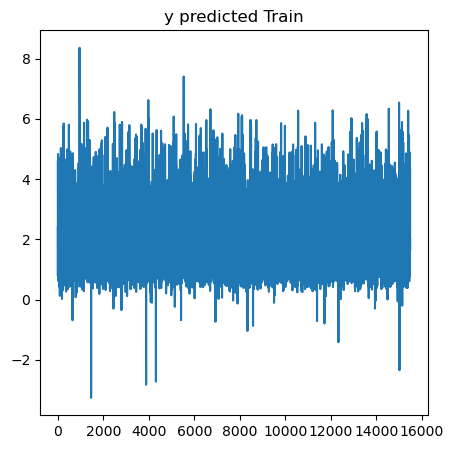


y predicted coefs     = [ 4.32219154e-01  9.13561205e-03 -9.96905857e-02  5.96282201e-01
 -5.97842212e-06 -3.92615753e-03 -4.21000246e-01 -4.33447819e-01]

y predicted intercept = -36.78697796031919

y predicted mean      = 2.066362731272692,             
y measured mean       = 2.068558169089147



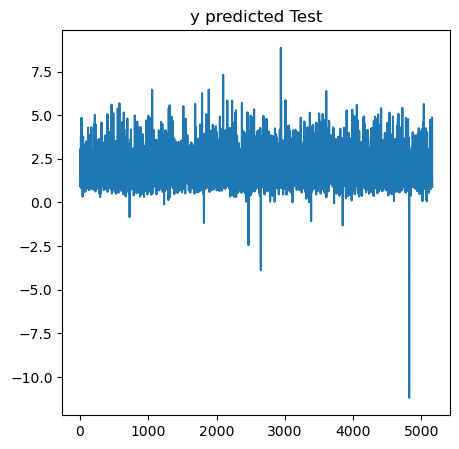


y predicted coefs     = [ 4.32219154e-01  9.13561205e-03 -9.96905857e-02  5.96282201e-01
 -5.97842212e-06 -3.92615753e-03 -4.21000246e-01 -4.33447819e-01]

y predicted intercept = -36.78697796031919

y predicted mean      = 2.0764446202343914,             
y measured mean       = 2.068558169089147


--------------------------------------
 MAE Train	= 0.45881094710506737,          
RMSE Train	= 0.6477752225474175

 MAE Test	= 0.4778773060346353,          
RMSE Test	= 0.6971675518887824

 MAE diff	= 0.019066358929567928           
RMSE diff	= 0.04939232934136495
--------------------------------------



(0.45881094710506737,
 0.6477752225474175,
 0.4778773060346353,
 0.6971675518887824)

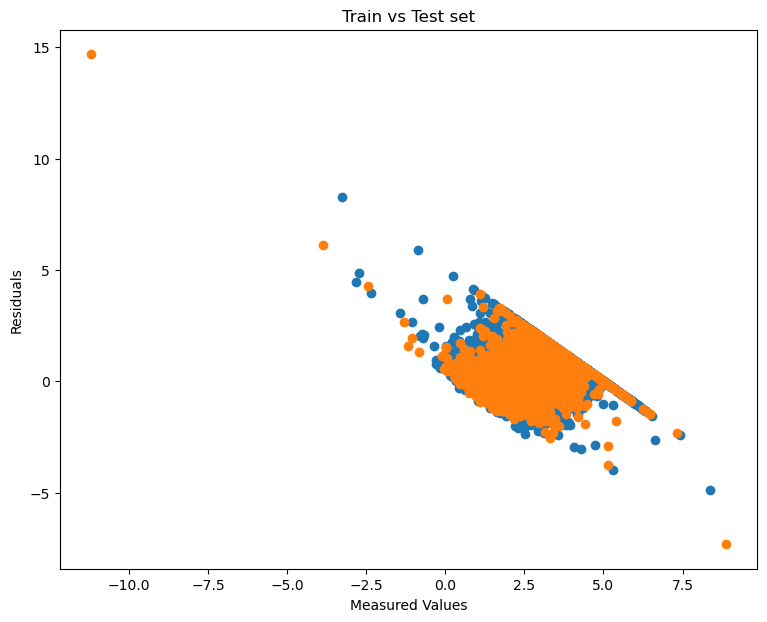

In [129]:
poly_pipeline(2)

### Exercise 6: Hyperparameter Selection and Cross-validation

How should we select the correct *degree* for our polynomial basis? Is the performance on the *training* set equal to the performance on the *test* set? Why?

In [138]:
# Your code here.

from sklearn.model_selection import cross_val_score

def deg_select(deg, cv, Xt = Xtr, yt = ytr):
                            
    print(f"Cross-validation on Training set\n")
    degrees = np.arange(1, deg + 1)
    c_list  = []
                            
    for degree in degrees:
        
        Xpol = PolynomialFeatures(degree).fit_transform(Xt)
        
        # kfold cross validation
        c_mean = - cross_val_score(LinearRegression(), Xpol, yt, cv = cv, scoring = "neg_mean_absolute_error").mean()
        
        c_list.append(c_mean)
        print(f"Score with degree {degree}: {c_mean}")
              
    best_deg = degrees[np.argmin(c_list)]
    print(f"Best degree is: {best_deg}\n")


deg_select(deg = 4, cv = 6, Xt = Xtr, yt = ytr)


Cross-validation on Training set

Score with degree 1: 0.5303759574935872
Score with degree 2: 0.4670846659601035
Score with degree 3: 4.648967303876259
Score with degree 4: 884.6064031072768
Best degree is: 2



**Your Final Analysis Here**: Summarize the conclusions you can make about the best hyperparameter settings for this dataset. How do you know your conclusions are supported by the data?


---

The best model fitting the data is the one with degree = 2. This also visible by plot (above) where residuals are smaller. 

Considering greater degrees the model gives back worse results, probably since it become more sensible to outliers.
